In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate
import csv

Convert raw PPG data for a subject to a dictionary where the keys of the dictionary are the wavelengths of the LED associated with the PPG values

In [ ]:
# Read MatLab PPG waveform file and convert to dictionary where the key value is the wavelength
# Parameters: file_path = path to the file
# Returns: dictionary
def mat_to_numpy_array_dict(file_path):
  numpy_dict = {"660nm": [], "730nm": [], "850nm": [], "940nm": []}
  mat = scipy.io.loadmat(file_path, simplify_cells=True)
  for row in mat["PPGdata"]["data"]:
    numpy_dict["660nm"].append(row[0])
    numpy_dict["730nm"].append(row[1])
    numpy_dict["850nm"].append(row[2])
    numpy_dict["940nm"].append(row[3])

  numpy_dict["660nm"] = np.array(numpy_dict["660nm"])
  numpy_dict["730nm"] = np.array(numpy_dict["730nm"])
  numpy_dict["850nm"] = np.array(numpy_dict["850nm"])
  numpy_dict["940nm"] = np.array(numpy_dict["940nm"])

  return numpy_dict

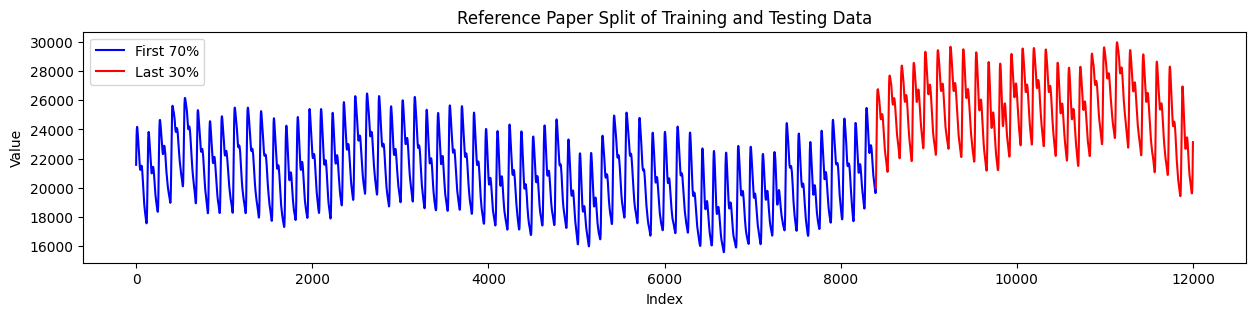

In [ ]:
data_leakage_illustration_waveforms = mat_to_numpy_array_dict("raw_data_mat/1.mat")
waveform = data_leakage_illustration_waveforms["660nm"]
# Split index (70%)
split_index = int(0.7 * len(waveform))
x = np.arange(len(waveform))
plt.figure(figsize=(15, 3))
# Plot the first 70% in blue
plt.plot(x[:split_index], waveform[:split_index], color='blue', label='First 70%')

# Plot the last 30% in red
plt.plot(x[split_index-1:], waveform[split_index-1:], color='red', label='Last 30%')  # Use split_index-1 for continuity

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Reference Paper Split of Training and Testing Data')
plt.show()

In [ ]:
Hb_df = pd.read_csv('Subjects information.csv')

ppg_values_all_subjects = []
for i in range(58):
  ppg_values_all_subjects.append(mat_to_numpy_array_dict(f"raw_data_mat/{i+1}.mat"))


Hb_df['660nm'] = None
Hb_df['730nm'] = None
Hb_df['850nm'] = None
Hb_df['940nm'] = None
for i in range(len(ppg_values_all_subjects)):
  Hb_df.at[i, '660nm'] = ppg_values_all_subjects[i]['660nm']
  Hb_df.at[i, '730nm'] = ppg_values_all_subjects[i]['730nm']
  Hb_df.at[i, '850nm'] = ppg_values_all_subjects[i]['850nm']
  Hb_df.at[i, '940nm'] = ppg_values_all_subjects[i]['940nm']


Hb_df.head()

,id,Hemoglobin(g/L),Age,Height(cm),Weight(kg),Gender,660nm,730nm,850nm,940nm
0,1,164,24,191,76,male,"[21575, 22045, 22494, 22883, 23203, 23484, 237...","[48860, 49339, 49805, 50208, 50539, 50834, 510...","[15637, 16453, 17219, 17880, 18430, 18909, 193...","[51713, 52422, 53105, 53700, 54195, 54631, 550..."
1,2,111,23,167,51,female,"[60006, 60453, 60864, 61239, 61577, 61878, 621...","[60902, 61024, 61137, 61242, 61337, 61420, 614...","[29731, 30360, 30941, 31473, 31954, 32382, 327...","[44548, 45162, 45718, 46222, 46681, 47098, 474..."
2,3,124,23,173,69,male,"[30001, 29947, 29892, 29837, 29796, 29770, 297...","[11920, 11872, 11822, 11772, 11744, 11731, 117...","[34438, 34353, 34267, 34185, 34122, 34077, 340...","[32968, 32878, 32792, 32729, 32695, 32677, 326..."
3,4,157,23,172,51,male,"[53882, 53910, 53965, 54050, 54163, 54300, 544...","[10139, 10171, 10227, 10323, 10465, 10644, 108...","[50716, 50778, 50884, 51032, 51226, 51472, 517...","[7078, 7111, 7198, 7325, 7487, 7692, 7945, 823..."
4,5,137,26,174,71,male,"[8944, 8903, 8864, 8832, 8806, 8774, 8737, 870...","[9857, 9813, 9767, 9724, 9685, 9644, 9605, 957...","[56080, 56027, 55972, 55919, 55866, 55811, 557...","[32802, 32755, 32709, 32664, 32613, 32553, 324..."


In [ ]:
def custom_print(print_val):
  value = str(print_val)
  k = 0
  print('|', end="")
  for char in value:
    print(char, end="")
    k += 1
  while k < 15:
    print('-', end="")
    k += 1
  print('|', end="")

def display_subject_info_full(subject):
  # Display subject characteristics
  print("|id-------------||Age------------||Height(cm)-----||Weight(kg)-----||Hemoglobin(g/L)||Gender---------|")
  custom_print(subject['id'])
  custom_print(subject['Age'])
  custom_print(subject['Height(cm)'])
  custom_print(subject['Weight(kg)'])
  custom_print(subject['Hemoglobin(g/L)'])
  custom_print(subject['Gender'])
  # Plotting Raw Data
  t = np.linspace(0, 60, len(subject['660nm']))
  plt.figure(figsize=(15, 1))
  plt.plot(t, subject['660nm'], color='#ff4000', linewidth=1)
  plt.title("660nm Raw")
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.show()
  plt.figure(figsize=(15, 1))
  plt.plot(t, subject['730nm'], color="#ff0000", linewidth=1)
  plt.title("730nm Raw")
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.show()
  plt.figure(figsize=(15, 1))
  plt.plot(t, subject['850nm'], color="#ad0202", linewidth=1)
  plt.title("850nm Raw")
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.show()
  plt.figure(figsize=(15, 1))
  plt.plot(t, subject['940nm'], color="#610101", linewidth=1)
  plt.title("940nm Raw")
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.show()

|id-------------||Age------------||Height(cm)-----||Weight(kg)-----||Hemoglobin(g/L)||Gender---------|
|1--------------||24-------------||191------------||76-------------||164------------||male-----------|

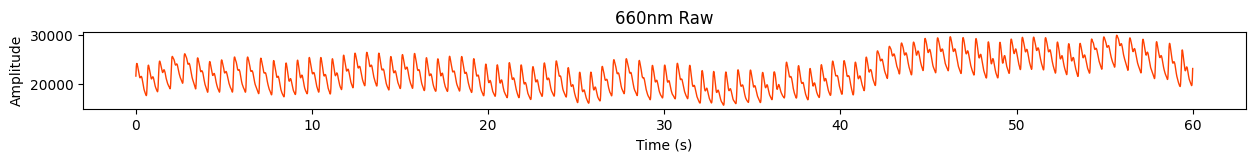

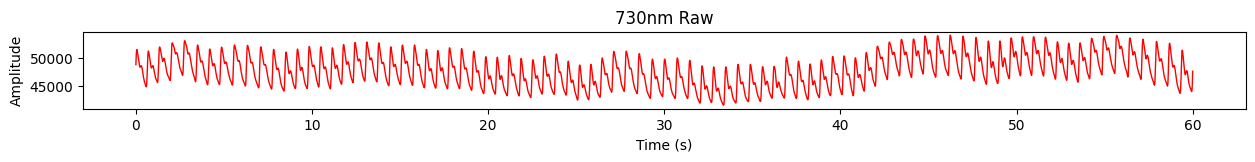

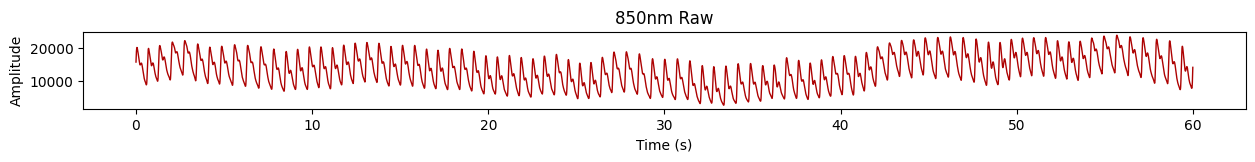

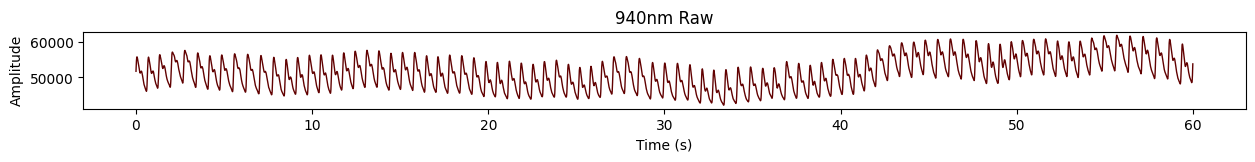

In [ ]:
display_subject_info_full(Hb_df.loc[0])

In [ ]:
# Remove any high frequency noise
def butter_lowpass_filter(waveform, cutoff, fs, order=4):
  b, a = signal.butter(N=order, Wn=cutoff, fs=fs, btype='low')
  return signal.filtfilt(b, a, waveform)

# Remove signal drift likely due to respiration
def filter(waveform, chop_size=49):
  t = np.linspace(0, 60, len(waveform))
  filtered = butter_lowpass_filter(waveform=waveform, cutoff=5, fs=200, order=4)
  peaks, _ = signal.find_peaks(-1 * filtered, prominence=750, distance=100)
  cs = interpolate.CubicSpline(t[peaks], filtered[peaks])
  plt.figure(figsize=(15, 3))
  plt.plot(t, waveform)
  plt.plot(t[peaks], waveform[peaks], "x")
  plt.plot(t, cs(t))
  plt.ylabel("Amplitude")
  plt.xlabel("Time (s)")
  plt.show()
  removed_envelope = filtered - cs(t) + np.mean(filtered[peaks])
  plt.figure(figsize=(15, 3))
  plt.plot(t[chop_size:-chop_size], removed_envelope[chop_size:-chop_size])
  plt.ylabel("Amplitude")
  plt.xlabel("Time (s)")
  plt.show()
  return removed_envelope[chop_size:-chop_size]

# Remove signal drift likely due to respiration
def split_filter(red1, red2, ir1, ir2, error_threshold=0.3):
  t = np.linspace(0, 60, len(ir2))
  filtered_red1 = butter_lowpass_filter(waveform=red1, cutoff=5, fs=200, order=4)
  filtered_red2 = butter_lowpass_filter(waveform=red2, cutoff=5, fs=200, order=4)
  filtered_ir1 = butter_lowpass_filter(waveform=ir1, cutoff=5, fs=200, order=4)
  filtered_ir2 = butter_lowpass_filter(waveform=ir2, cutoff=5, fs=200, order=4)
  peaks, _ = signal.find_peaks(-1 * filtered_ir2, prominence=750, distance=100)

  # plt.figure(figsize=(15, 1))
  # plt.plot(t, red1)
  # plt.plot(t[peaks], red1[peaks], "x")
  # plt.show()

  segment_lengths = []
  segments_red1 = []
  segments_red2 = []
  segments_ir1 = []
  segments_ir2 = []
  for i in range(len(peaks) - 1):
    pulse_red1 = filtered_red1[peaks[i]:peaks[i + 1]]
    pulse_red2 = filtered_red2[peaks[i]:peaks[i + 1]]
    pulse_ir1 = filtered_ir1[peaks[i]:peaks[i + 1]]
    pulse_ir2 = filtered_ir2[peaks[i]:peaks[i + 1]]

    norm_pulse_red1 = (pulse_red1 - np.min(pulse_red1)) / (np.max(pulse_red1) - np.min(pulse_red1))
    norm_pulse_red2 = (pulse_red2 - np.min(pulse_red2)) / (np.max(pulse_red2) - np.min(pulse_red2))
    norm_pulse_ir1 = (pulse_ir1 - np.min(pulse_ir1)) / (np.max(pulse_ir1) - np.min(pulse_ir1))
    norm_pulse_ir2 = (pulse_ir2 - np.min(pulse_ir2)) / (np.max(pulse_ir2) - np.min(pulse_ir2))

    error_red1 = np.max(np.abs(norm_pulse_red1 - norm_pulse_ir2))
    error_red2 = np.max(np.abs(norm_pulse_red2 - norm_pulse_ir2))
    error_ir1 = np.max(np.abs(norm_pulse_ir1 - norm_pulse_ir2))

    if error_red1 > error_threshold or error_red2 > error_threshold or error_ir1 > error_threshold:
      print(i, "red1:", error_red1, "red2:", error_red2, "ir1:", error_ir1)
      continue
    else:
      segment_length = []
      for i in range(100):
        segment_length.append(len(pulse_red1))
      segment_lengths.append(segment_length)
      segments_red1.append(signal.resample(pulse_red1, 100))
      segments_red2.append(signal.resample(pulse_red2, 100))
      segments_ir1.append(signal.resample(pulse_ir1, 100))
      segments_ir2.append(signal.resample(pulse_ir2, 100))


  return np.array(segment_lengths), np.array(segments_red1), np.array(segments_red2), np.array(segments_ir1), np.array(segments_ir2)

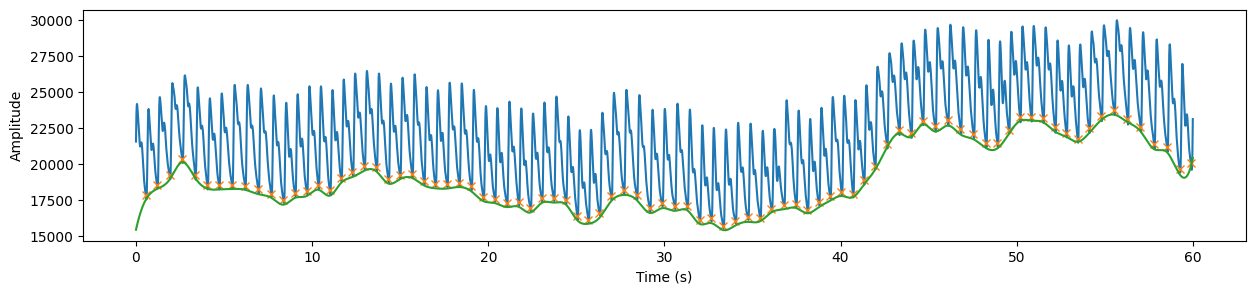

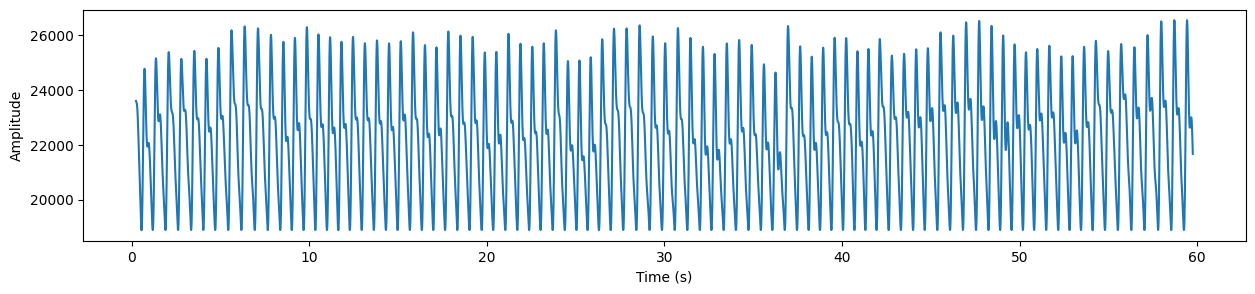

array([23596.3326956 , 23582.03071105, 23570.85117298, ...,
       21912.37558655, 21791.82990306, 21668.87672115])

In [ ]:
filter(Hb_df.at[0, '660nm'], 50)

In [ ]:
segment_lengths, segments_red1, segments_red2, segments_ir1, segments_ir2 = split_filter(Hb_df.at[0, '660nm'], Hb_df.at[0, '730nm'], Hb_df.at[0, '850nm'], Hb_df.at[0, '940nm'])

In [ ]:
Hb_df['660nm_filt'] = None
Hb_df['730nm_filt'] = None
Hb_df['850nm_filt'] = None
Hb_df['940nm_filt'] = None

for i in range(0, len(ppg_values_all_subjects)):
  segment_lengths, segments_red1, segments_red2, segments_ir1, segments_ir2 = split_filter(Hb_df.at[i, '660nm'], Hb_df.at[i, '730nm'], Hb_df.at[i, '850nm'], Hb_df.at[i, '940nm'])

  all_red1 = segments_red1.flatten()
  all_red2 = segments_red2.flatten()
  all_ir1 = segments_ir1.flatten()
  all_ir2 = segments_ir2.flatten()
  all_segment_lengths = segment_lengths.flatten()


  with open("split_down_processed_data/" + str(i + 1) + ".csv", "w") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["660nm", "730nm", "850nm", "940nm", "Length", "id", "Age", "Height(cm)", "Weight(kg)", "Hemoglobin(g/L)", "Gender"])
    writer.writerow([all_red1[0], all_red2[0], all_ir1[0], all_ir2[0], all_segment_lengths[0], i + 1, Hb_df.at[i, 'Age'], Hb_df.at[i, 'Height(cm)'], Hb_df.at[i, 'Weight(kg)'], Hb_df.at[i, 'Hemoglobin(g/L)'], Hb_df.at[i, 'Gender']])
    for j in range(1, len(all_red1)):
      writer.writerow([all_red1[j], all_red2[j], all_ir1[j], all_ir2[j], all_segment_lengths[j]])

  # plt.figure(figsize=(15, 0.8))
  # plt.plot(Hb_df.at[i, '660nm'], color='#ff4000', linewidth=1)
  # plt.xlabel("660nm Original")
  # plt.ylabel("Amplitude")
  # plt.show()
  # plt.figure(figsize=(15, 0.8))
  # plt.plot(np.array(segments_red1).flatten(), color='#ff4000', linewidth=1)
  # plt.xlabel("660nm Artifacts Removed")
  # plt.ylabel("Amplitude")
  # plt.show()
  # plt.figure(figsize=(15, 0.8))
  # plt.plot(Hb_df.at[i, '730nm'], color="#ff0000", linewidth=1)
  # plt.xlabel("730nm Original")
  # plt.ylabel("Amplitude")
  # plt.show()
  # plt.figure(figsize=(15, 0.8))
  # plt.plot(np.array(segments_red2).flatten(), color="#ff0000", linewidth=1)
  # plt.xlabel("730nm Artifacts Removed")
  # plt.ylabel("Amplitude")
  # plt.show()
  # plt.figure(figsize=(15, 0.8))
  # plt.plot(Hb_df.at[i, '850nm'], color="#ad0202", linewidth=1)
  # plt.xlabel("850nm Original")
  # plt.ylabel("Amplitude")
  # plt.show()
  # plt.figure(figsize=(15, 0.8))
  # plt.plot(np.array(segments_ir1).flatten(), color="#ad0202", linewidth=1)
  # plt.xlabel("850nm Artifacts Removed")
  # plt.ylabel("Amplitude")
  # plt.show()
  # plt.figure(figsize=(15, 0.8))
  # plt.plot(Hb_df.at[i, '940nm'], color="#610101", linewidth=1)
  # plt.xlabel("940nm Original")
  # plt.ylabel("Amplitude")
  # plt.show()
  # plt.figure(figsize=(15, 0.8))
  # plt.plot(np.array(segments_ir2).flatten(), color="#610101", linewidth=1)
  # plt.xlabel("940nm Artifacts Removed")
  # plt.ylabel("Amplitude")
  # plt.show()

  # with open("test.csv", "w") as csv_file:
  #   writer = csv.writer(csv_file)
  #   for i in len()


  #break


16 red1: 0.012677608919107297 red2: 0.019214239953096235 ir1: 0.7685427703988594
17 red1: 0.012119886113818312 red2: 0.02117179333348229 ir1: 0.8749124059083794
77 red1: 0.9656015126279176 red2: 0.028120810837329452 ir1: 0.011602836796565708
78 red1: 0.9989873428859729 red2: 0.02221902893735328 ir1: 0.008748711736864312
64 red1: 0.4547530946399063 red2: 0.013364601502419592 ir1: 0.0109517175841225
65 red1: 0.7910227793780974 red2: 0.01836902998568453 ir1: 0.009793050942293435
10 red1: 0.5458783002108406 red2: 0.5882038185891924 ir1: 0.17018664962453406
61 red1: 0.45567551981812165 red2: 0.4202522288804091 ir1: 0.1254616954203847
68 red1: 0.3040076658165983 red2: 0.2875756144034064 ir1: 0.06000190470737157
74 red1: 0.3185585160661918 red2: 0.2962481438854292 ir1: 0.10827067279678762
90 red1: 0.29210868093938597 red2: 0.3074730543485611 ir1: 0.12157569454593609
10 red1: 0.06036090620571255 red2: 0.0337026008702111 ir1: 1.0
11 red1: 0.014923792431479121 red2: 0.022018681702823784 ir1: 1.0

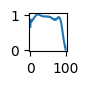

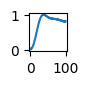

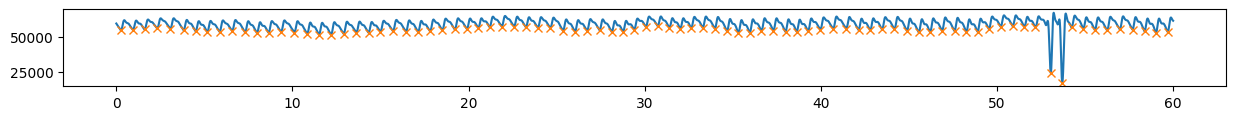

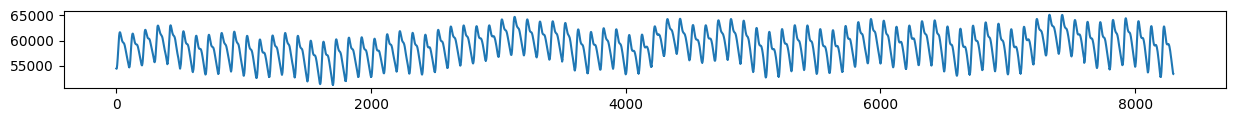

In [ ]:
hr, split = split_filter(Hb_df.at[5, '660nm'])

|id-------------||Age------------||Height(cm)-----||Weight(kg)-----||Hemoglobin(g/L)||Gender---------|
|6--------------||25-------------||164------------||48-------------||114------------||female---------|

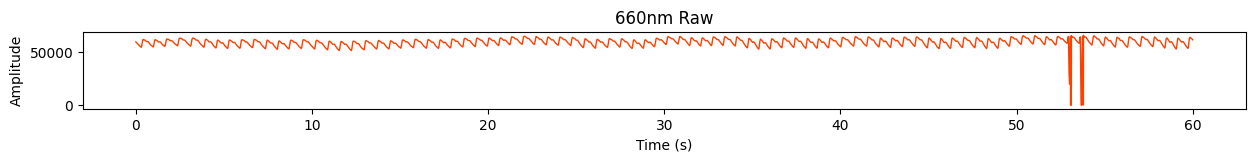

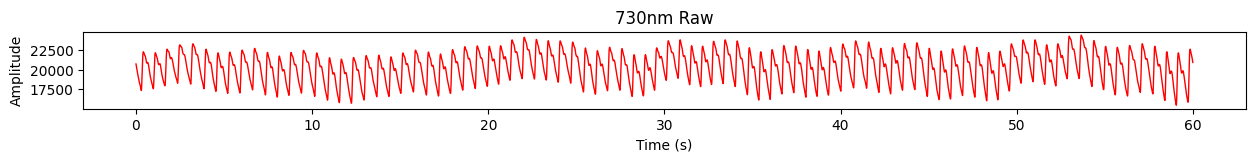

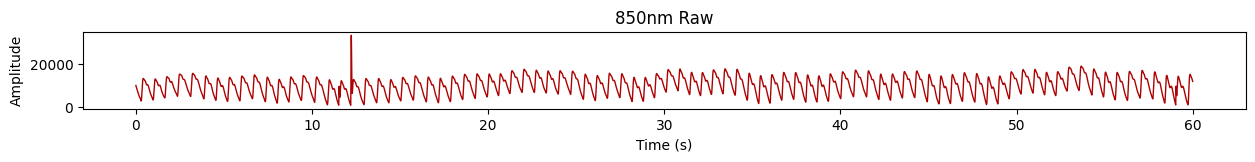

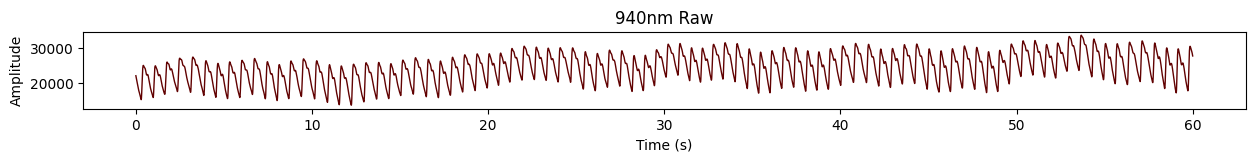

In [ ]:
display_subject_info_full(Hb_df.loc[5])

In [ ]:
!zip -r /content/split_down_processed_data.zip /content/split_down_processed_data//
from google.colab import files
files.download("/content/split_down_processed_data.zip")

  adding: content/split_down_processed_data// (stored 0%)
  adding: content/split_down_processed_data//56.csv (deflated 52%)
  adding: content/split_down_processed_data//15.csv (deflated 52%)
  adding: content/split_down_processed_data//45.csv (deflated 53%)
  adding: content/split_down_processed_data//26.csv (deflated 53%)
  adding: content/split_down_processed_data//10.csv (deflated 53%)
  adding: content/split_down_processed_data//51.csv (deflated 53%)
  adding: content/split_down_processed_data//2.csv (deflated 53%)
  adding: content/split_down_processed_data//19.csv (deflated 52%)
  adding: content/split_down_processed_data//6.csv (deflated 52%)
  adding: content/split_down_processed_data//44.csv (deflated 52%)
  adding: content/split_down_processed_data//48.csv (deflated 53%)
  adding: content/split_down_processed_data//13.csv (deflated 53%)
  adding: content/split_down_processed_data//3.csv (deflated 53%)
  adding: content/split_down_processed_data//9.csv (deflated 52%)
  adding

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(len(ppg_values_all_subjects)):
  np.savetxt(str(i + 1) + ".csv", Hb_df.at[i, '660nm_filt'], delimiter=",")
  Hb_df.at[i, '660nm_filt'] = filter(Hb_df.at[i, '660nm'])
  Hb_df.at[i, '730nm_filt'] = filter(Hb_df.at[i, '730nm'])
  Hb_df.at[i, '850nm_filt'] = filter(Hb_df.at[i, '850nm'])
  Hb_df.at[i, '940nm_filt'] = filter(Hb_df.at[i, '940nm'])

In [ ]:
Hb_df.to_csv('all_subjects_processed.csv', index=False)

In [ ]:
# Reads a CSV file into a DataFrame
df = pd.read_csv('all_subjects_processed.csv')

# Prints the DataFrame
df.head()

,id,Hemoglobin(g/L),Age,Height(cm),Weight(kg),Gender,660nm,730nm,850nm,940nm,660nm_filt,730nm_filt,850nm_filt,940nm_filt
0,1,164,24,191,76,male,[21575 22045 22494 ... 22029 22562 23133],[48860 49339 49805 ... 46484 47037 47635],[15637 16453 17219 ... 12080 13033 14037],[51713 52422 53105 ... 52125 52921 53788],[18895.25228097 18887.23348815 18896.35038306 ...,[44440.76256447 44435.32522595 44447.5147727 ...,[7560.92966106 7557.77094895 7584.71087501 ......,[46471.92198232 46464.91090575 46483.39563401 ...
1,2,111,23,167,51,female,[60006 60453 60864 ... 62037 61946 61857],[60902 61024 61137 ... 63237 63207 63177],[29731 30360 30941 ... 31893 31750 31614],[44548 45162 45718 ... 47117 46967 46825],[54653.69087769 54645.62337167 54657.34929195 ...,[60635.04828262 60635.13763455 60640.53402022 ...,[23474.84249091 23471.23671779 23495.09949008 ...,[38612.03624769 38598.73611012 38612.35005519 ...
2,3,124,23,173,69,male,[30001 29947 29892 ... 30837 30756 30670],[11920 11872 11822 ... 13262 13190 13109],[34438 34353 34267 ... 38762 38643 38521],[32968 32878 32792 ... 37676 37584 37480],[29049.94725715 29081.65616071 29137.14411108 ...,[11649.65503659 11681.14450695 11734.23294988 ...,[35590.0467349 35626.95818471 35695.68171692 ...,[34347.10938249 34387.38171289 34457.48464249 ...
3,4,157,23,172,51,male,[53882 53910 53965 ... 56273 56267 56265],[10139 10171 10227 ... 11620 11613 11613],[50716 50778 50884 ... 51247 51230 51214],[7078 7111 7198 ... 7287 7256 7215],[52940.14807077 52949.43151182 52965.96986096 ...,[8745.90583471 8755.48949763 8773.4553634 ......,[47977.2054896 47984.71446142 48004.72152327 ...,[4107.64454031 4119.71277122 4144.01421733 ......
4,5,137,26,174,71,male,[ 8944 8903 8864 ... 10822 10966 11150],[9857 9813 9767 ... 9401 9590 9832],[56080 56027 55972 ... 55842 56116 56461],[32802 32755 32709 ... 35401 35611 35878],[5819.7916497 5833.11274555 5859.26740837 ......,[4753.49004742 4762.1407493 4785.70462556 ......,[49055.95015405 49071.32364521 49109.31579634 ...,[28572.28617698 28585.26334649 28617.1768881 ...


In [ ]:
def unpack(waveform):
  waveform = waveform.strip('[]').split()
  for i in range(len(waveform)):
    waveform[i] = float(waveform[i])
  return waveform

In [ ]:
unpack(df.at[1, '660nm'])

ValueError: could not convert string to float: '...'